# Fitter Package(part 1)
is a Python package which chooses the best fitted distribution for your data. However, we are going to limit to only following distributions: <b>Normal</b> distribution, <b>Uniform</b> Distribution and <b>Exponential</b> Distribution.
### If you have forgotten or unsure about the distributions please recap from previous Sections and you can refer to the links and videos provided
[Random Variables and Uniform Distribution](https://www.mathsisfun.com/data/random-variables-continuous.html)<br>
[Normal Distribution](https://www.mathsisfun.com/data/standard-normal-distribution.html)


In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/hgtMWR3TFnY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/-qt8CPIadWQ" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/6WMZ7J0wwMI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Goodness of Fit

<div style="font-size:16px; line-height:25pt">
Goodness of Fit is test that identifies how well certain <b>distribution</b> or model fits the <b>(observed)data</b>. There are different types of <b>Tests</b> which assess whether a given distribution is suited for a data-set. Example of names of those tests:
<br>Chi Square Test.(Previous Topic)
<br>Kolmogorov–Smirnov test.
<br>Cramér–von Mises criterion.
<br>Anderson–Darling test.
<br>Shapiro–Wilk test.
<br>Kuiper's test and others.
<br>However, we are going to get familiarized with the most frequent used test called <b>Chi Square Test</b>. Please, refer to the video below to get the concept of Chi Squared test
</div>

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/b3o_hjWKgQw" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


<div style="font-size:16px; line-height:25pt">
We are going to be using <b>Fitter</b> package which will help us to identify best fitted <b>Distribution</b> for any data-set. 
Once data is collected and converted to python(<b>Pandas</b> data-table), you can use Fitter and make sure that chosen distribution has the least <b>(sumsquare)</b>error.
    </div>

## Installation and importing

In [3]:
!pip install fitter
#for installing fitter package

from fitter import Fitter
#importing Fitter that scans the data and displays which distribution has the lowest Error


[Documentation of Fitter Package](https://pypi.org/project/fitter/)

## Usage
We have a Database of Fitness Customers which has records such as Name, Weight, Height<br>
<img src="fitness_table.png">

In [5]:
#Let's import PANDAS which is another python library and it will help us to READ data from many formats, but 
#we will be reading data from only Excel file.
import pandas as pd  #Importing pandas

fitness_db = pd.read_excel('sample_data_bmi.xlsx', "Sheet1", skiprows=1)
#Here I am reading excel file and storing into a variable called "fitness_db"
#So "read_excel" is a function that does the job and we need to provide NAME of excel file and which sheet(2 important parameters)

weight = fitness_db['Weight'] #Storing "Weight" data into a list
height = fitness_db['Height'] #Storing "Height" data into a list
bmi = fitness_db['BMI'] #Storing "BMI" data into a list



## Probability Distribution for 'Height'

Fitted norm distribution with error=0.34009512603453906)
Fitted expon distribution with error=0.33930800767536023)
Fitted uniform distribution with error=0.3265306122448981)


,sumsquare_error
uniform,0.326531
expon,0.339308
norm,0.340095


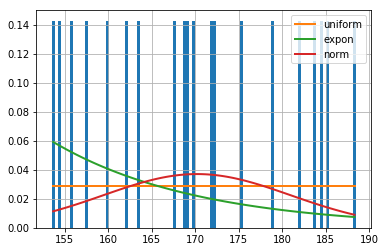

In [7]:
fitter_for_height = Fitter(height, distributions=['norm', 'expon', 'uniform'])
#Step 1: First fitter will be for height data and we will see which of these three distributions fit our data with least error
#Tip: if you do not provide the distributions, Fitter will scan all the distributions in the SciPy.
fitter_for_height.fit()
fitter_for_height.summary() #Summary shows the error and the graph of our data along with the distributions



## Probability Distribution for 'Weight'

Fitted norm distribution with error=0.6739110215551474)
Fitted expon distribution with error=0.7433353930620359)
Fitted uniform distribution with error=0.7128536422365871)


,sumsquare_error
norm,0.673911
uniform,0.712854
expon,0.743335


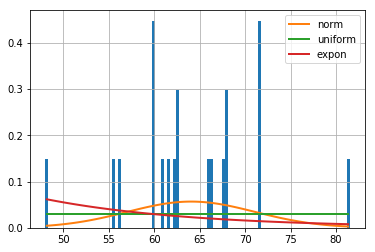

In [8]:
#Let's repeat it for 'weight' data
fitter_for_weight = Fitter(weight, distributions=['norm', 'expon', 'uniform'])
fitter_for_weight.fit()
fitter_for_weight.summary()

## Getting the parameters of the distribution
<div style="font-size:16px; line-height:25pt">
After we have chosen the best probability distribution, we can get the parameters of the distribution with <b>fitted_param</b>.<br>
As we can see, best fitted distribution for "height" data is <b>Uniform</b> Distribution and for "weight" data is <b>Normal</b> Distribution. Now, we can get the parameters of both <b>Distribution</b>
    </div>

In [9]:
fitter_for_height.fitted_param['uniform']

(153.5, 35.0)

<div style="font-size:16px; line-height:25pt">
Uniform Distribution has two parameters which are the <b>beginning</b> and the <b>end</b> of the distribution. For example, "Height" data starts at 153.5 until 188.5 and these two values are the parameters of <b>Uniform</b> Distribution.
    </div>

In [10]:
uniform_param = fitter_for_height.fitted_param['uniform']
#Let's store the parameters in a variable which will later be used to plot the Distribution

In [11]:
fitter_for_weight.fitted_param['norm']

(64.05, 7.036582977553808)

<div style="font-size:16px; line-height:25pt">
Normal Distribution has also two parameters which are the <b>Mean</b> and <b>Standard Deviation</b> of the distribution. So, average weight in our data is 64.05(kg) and they vary by 7.03.
    <div>

In [12]:
norm_param = fitter_for_weight.fitted_param['norm']
#Let's store the parameters in a variable which will later be used to plot the Distribution

## Plotting the Probability Distribution
We will be using Matplotlib package to plot the Distribution and use Scipy package to create the distribution

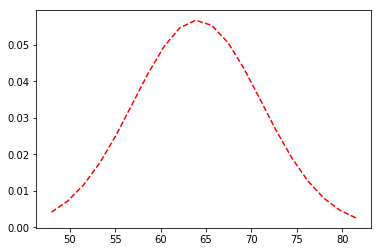

In [17]:
#Here is the plot of Normal Distribution for Weight dataset
from pylab import linspace, plot #for plotting
import scipy.stats

norm_dist = scipy.stats.norm #Creating Normal Distribution

X = linspace(min(weight),max(weight), len(weight)) #Linspace has 3 parameters: minimum and maximum value and number of samples
pdf_fitted = norm_dist.pdf(X, *norm_param) #Creating pdf of the normal distribution
plot(X, pdf_fitted, '--r')  #Plotting the distribution

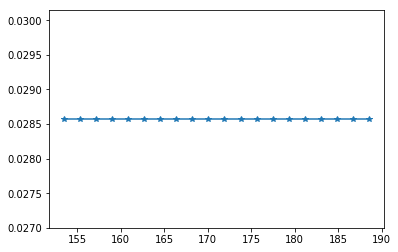

In [23]:
#Here is the plot of Uniform Distribution for Height dataset
from pylab import linspace, plot #for plotting
import scipy.stats

uniform_dist = scipy.stats.uniform #Creating Uniform Distribution

X = linspace(min(height),max(height), len(height)) #Linspace has 3 parameters: minimum and maximum value and number of samples
pdf_fitted = uniform_dist.pdf(X, *uniform_param)
plot(X, pdf_fitted, marker='*')

## Questions:

Following is part of data from file "Practical Example.Descriptive-statistics-lesson"
<img src="table_for_question.png">

In [45]:
#Read the file named "Practical-example.Descriptive-statistics-lesson".
#Store Area, Price and Month of Sale rows into three separate lists.

#Precode for Questions
import pandas as pd  #Importing pandas

fitness_db = pd.read_excel('sample_data_bmi.xlsx', "Sheet1", skiprows=1)
#Read the excel file shown above and store it in "product_db"
product_db 


Question1. Find which distribution fits best for "BMI" data.(Limit Distributions to only Uniform, Normal and Exponential)

In [24]:
#Precode for Question 1

#Store "BMI" data into a list.


#Store Fitter object in a variable below. 
fitter_for_bmi

NameError: name 'fitter_for_bmi' is not defined

Question2. Find the Parameters of the distribution that you chose in question 1.

In [ ]:
#Precode for Question 2
#Tip: Make use of "fit" and "summary" functions of Fitter

bmi_dist_param

Question3. Plot the pdf of the distribution that you chose in Question1.

In [ ]:
#Precode for Question 3
from pylab import linspace, plot #for plotting
import scipy.stats as st

#Create the distribution
bmi_dist

X = linspace() #takes 3 parameters: minimum and maximum value and number of samples
bmi_dist_pdf = bmi_dist.pdf() #takes 2 parameters: Linspace and parameters of the distribution
plot()

Question4. Find which distribution fits best for "Area" data. (Limit Distributions to only Uniform, Normal and Exponential)

In [ ]:
#Precode for Question 4

#Store "Area" data into a list.

#Store Fitter object in a variable below. 
fitter_for_area

Question5. Find and explain the parameters of the distribution you chose for "Area" data.

In [ ]:
#Precode for Question 5

area_dist_param

Question6. Plot the pdf of the distribution for "Area" data and use the parameters you found.

In [ ]:
#Precode for Question 6
#Tip: Importing library should be done once per file
#Create the distribution
area_dist

X = linspace() #takes 3 parameters: minimum and maximum value and number of samples
area_dist_pdf = area_dist.pdf() #takes 2 parameters: Linspace and parameters of the distribution
plot()

Question7. Find which distribution fits best for "Price" data. (Limit Distributions to only Uniform, Normal and Exponential)

In [25]:
#Precode for Question 7

#Store "Price" data into a list.

#Store Fitter object in a variable below. 
fitter_for_price

NameError: name 'fitter_for_price' is not defined

Question8. Find and explain the parameters of the distribution you chose for "Price" data.

In [ ]:
#Precode for Question 8

price_dist_param

Question9. Plot the pdf of the distribution for "Price" data and use the parameters you found.

In [ ]:
#Precode for Question 9
#Create the distribution
price_dist

X = linspace() #takes 3 parameters: minimum and maximum value and number of samples
price_dist_pdf = price_dist.pdf() #takes 2 parameters: Linspace and parameters of the distribution
plot()

Question10. Find which distribution fits best for "Month of Sale" data. (Limit Distributions to only Uniform, Normal and Exponential)

In [ ]:
#Precode for Question 10

#Store "Price" data into a list.

#Store Fitter object in a variable below. 
fitter_for_monthly_sale

Question11. Find and explain the parameters of the distribution you chose for "Month of Sale" data.

In [ ]:
#Precode for Question 11

monthly_sale_dist_param

Question12. Plot the pdf of the distribution for "Month of Sale" data and use the parameters you found.

In [ ]:
#Precode for Question 12
#Create the distribution
monthly_sale_dist

X = linspace() #takes 3 parameters: minimum and maximum value and number of samples
monthly_sale_dist_pdf = monthly_sale_dist.pdf() #takes 2 parameters: Linspace and parameters of the distribution
plot()